<a href="https://colab.research.google.com/github/wasif31/Artificial-Intelligence-Course-Lab/blob/main/3.Estimate_House_Rent_Using_Linear_regression/Linear_Regression_House_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 
Linear regression is a form of statistical analysis that shows the relationship between two or more continuous variables. It creates a predictive model using relevant data to show trends. Analysts typically use the “least square method” to create the model. There are other methods, but the least square method is the most commonly used. 
Below is a graph that depicts the relationship between the heights and weights of a sample of people. The red line is the linear regression that shows the height of a person is positively related to its weight.

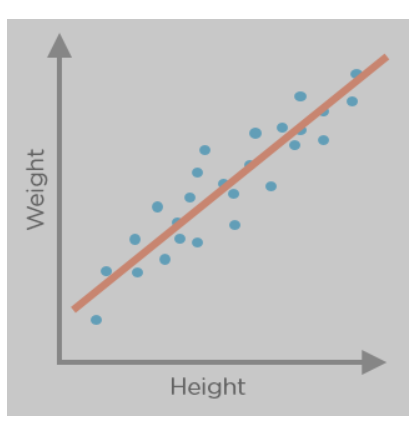







---







In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

# Feature Selection
from sklearn.feature_selection import RFE
# Scaler
from sklearn.preprocessing import MinMaxScaler

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

#Validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
rentdataurl = 'https://raw.githubusercontent.com/wasif31/Artificial-Intelligence-Course-Lab/main/3.Estimate_House_Rent_Using_Linear_regression/house_rent_data.csv.csv'
dataframe1 = pd.read_csv(rentdataurl)
# Dataset is now stored in a Pandas Dataframe


In [29]:
dataframe1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,id,date,rent_fee,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latatitude,longitude,sqft_living15,sqft_lot15
1,1,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
2,2,20140512T000000,1.23E+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,3,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,5000
5,5,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
6,6,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
7,7,20150403T000000,662500,3,2.5,3560,9796,1,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
8,8,20140527T000000,468000,2,1,1160,6000,1,0,0,4,7,860,300,1942,0,98115,47.69,-122.292,1330,6000
9,9,20140528T000000,310000,3,1,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697


# Field Definations

id - unique identified for a house

*   date - Date house was sold
*   rent fee - Price is prediction target


*  bedrooms - Number of Bedrooms/House

*   bathrooms - Number of bathrooms/bedrooms

*   sqft_living - square footage of the home

*   sqft_lot - square footage of the lot

*   floors - Total floors (levels) in house

*   waterfront - House which has a view to a waterfront

*   view - Has been viewed
*   condition - How good the condition is ( Overall )


*   grade - overall grade given to the housing unit, based on King County grading system


*   sqft_above - square footage of house apart from basement


* sqft_basement - square footage of the basement


*   yr_built - Built Year


*  zipcode - zip


*   lat - Latitude coordinate

*  long - Longitude coordinate

*   sqft_living15 - The square footage of interior housing living space for the 
*   nearest 15 neighbors


*  sqft_lot15- The square footage of the land lots of the nearest 15 neighbors






In [37]:
dataframe1.shape
#number of rows,columns


(5313, 21)

In [38]:
dataframe1.describe()
#Statistical summary of data frame.

,id,rent_fee,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latatitude,longitude,sqft_living15,sqft_lot15
count,5313.000000,5.313000e+03,5313.000000,5313.000000,5313.000000,5.313000e+03,5313.00000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000
mean,2657.000000,5.384864e+05,3.374365,2.063806,2064.225485,1.613046e+04,1.43290,0.008846,0.240166,3.451722,7.600791,1757.828157,306.397327,1966.833804,94.341991,98078.490683,47.559390,-122.215507,1981.420290,13378.067570
std,1533.875321,3.810927e+05,0.907049,0.771756,921.483589,4.559066e+04,0.51031,0.093646,0.768295,0.675500,1.164895,819.637189,455.508887,28.221999,423.725467,53.964673,0.139815,0.141055,676.757322,26164.967348
min,1.000000,7.500000e+04,0.000000,0.000000,380.000000,6.090000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,1329.000000,3.188880e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1949.000000,0.000000,98033.000000,47.462600,-122.329000,1490.000000,5400.000000
50%,2657.000000,4.500000e+05,3.000000,2.000000,1900.000000,7.884000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1968.000000,0.000000,98070.000000,47.573200,-122.233000,1830.000000,7807.000000
75%,3985.000000,6.500000e+05,4.000000,2.500000,2506.000000,1.123400e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.129000,2350.000000,10436.000000
max,5313.000000,7.060000e+06,9.000000,6.750000,10040.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,7680.000000,3000.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


Here,

*  count	- total number
*   mean-mean or average

*   std-standarf deviation

*   min-minimum value
*   25%-25th percentiles


*   50%-50th percentiles


*  75%-75th percentiles
*   max-maximum value







In [40]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5313 non-null   int64  
 1   date           5313 non-null   object 
 2   rent_fee       5313 non-null   float64
 3   bedrooms       5313 non-null   int64  
 4   bathrooms      5313 non-null   float64
 5   sqft_living    5313 non-null   int64  
 6   sqft_lot       5313 non-null   int64  
 7   floors         5313 non-null   float64
 8   waterfront     5313 non-null   int64  
 9   view           5313 non-null   int64  
 10  condition      5313 non-null   int64  
 11  grade          5313 non-null   int64  
 12  sqft_above     5313 non-null   int64  
 13  sqft_basement  5313 non-null   int64  
 14  yr_built       5313 non-null   int64  
 15  yr_renovated   5313 non-null   int64  
 16  zipcode        5313 non-null   int64  
 17  latatitude     5313 non-null   float64
 18  longitud

In [41]:
dataframe1.isna().sum()
# to check if there is any null value.as we have no null,we dont need replace 0 to null for now

id               0
date             0
rent_fee         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
latatitude       0
longitude        0
sqft_living15    0
sqft_lot15       0
dtype: int64

Explore

In [43]:
dataframe1['date'] = pd.to_datetime(dataframe1['date'])
#convert datetime to date

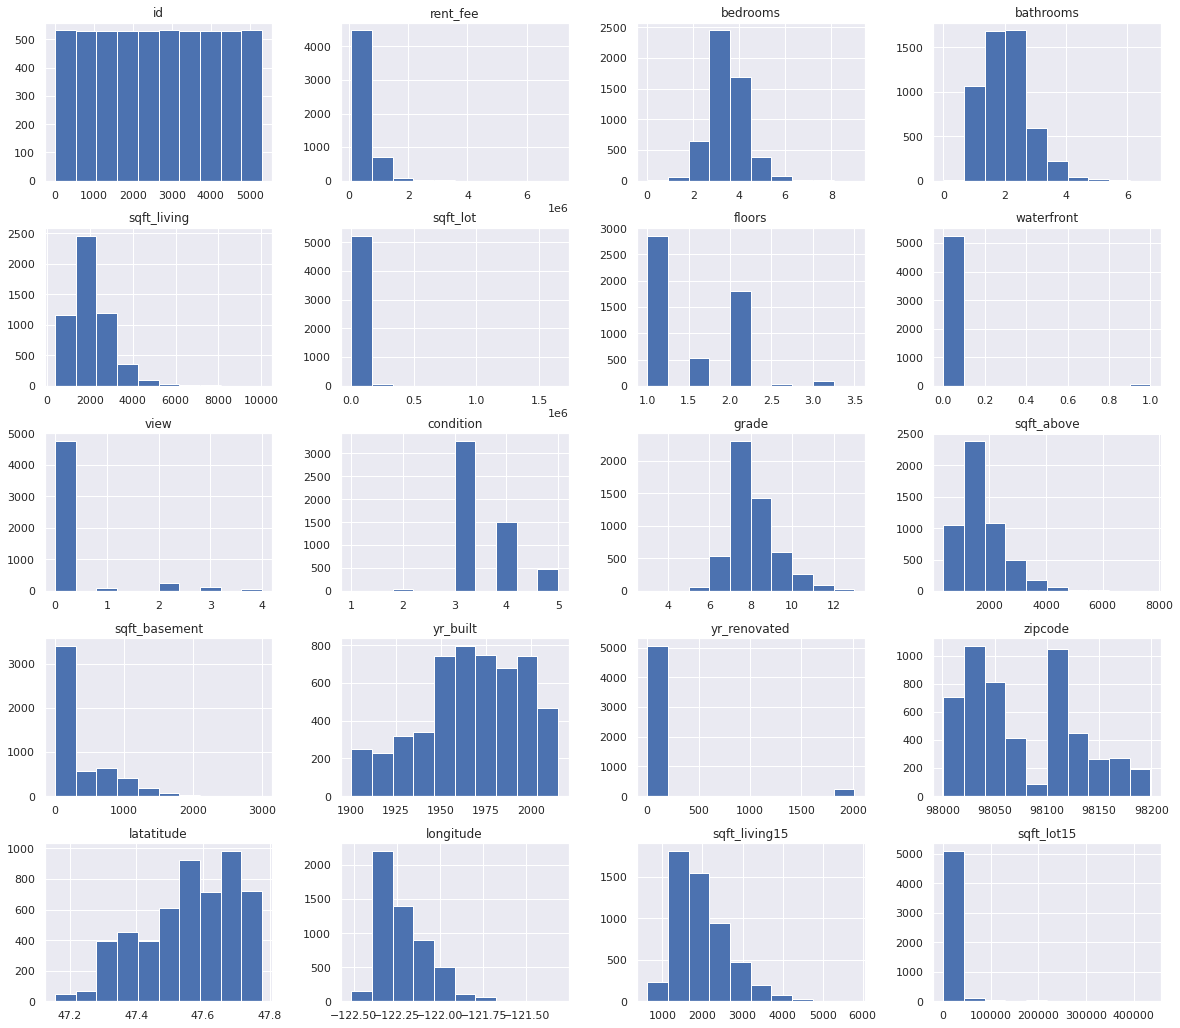

In [44]:
dataframe1.hist(figsize = (20,18));

In [6]:
dataframe1.columns

Index(['id', 'date', 'rent_fee', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latatitude', 'longitude', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

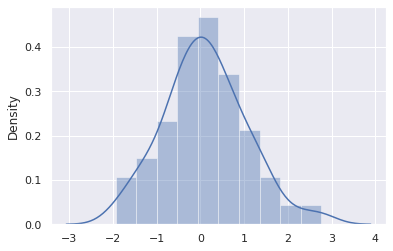

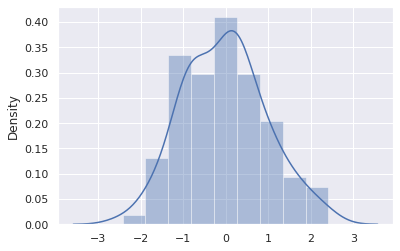

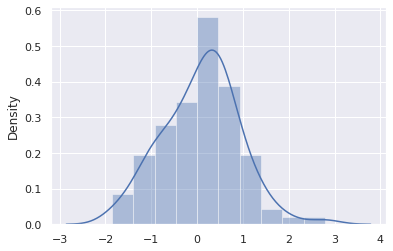

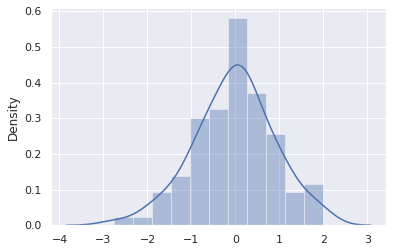

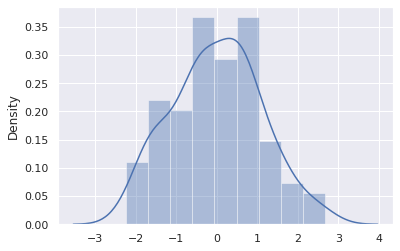

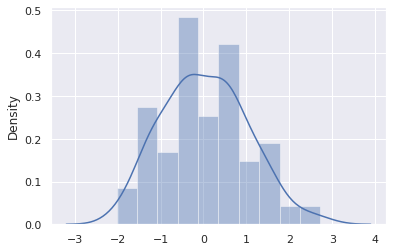

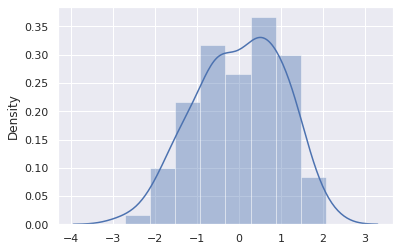

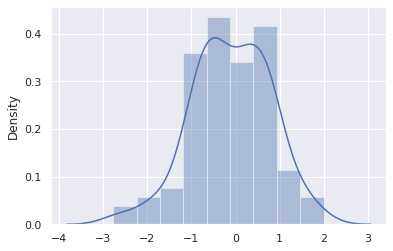

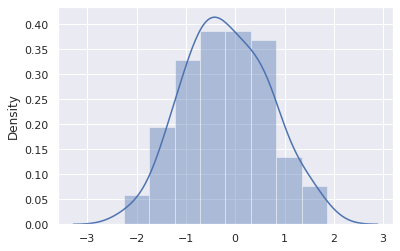

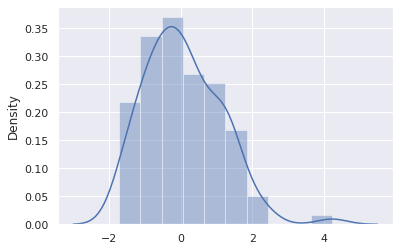

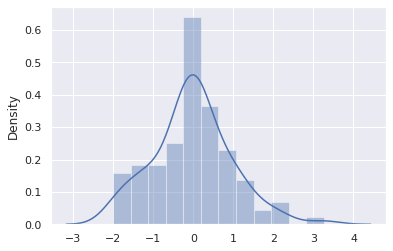

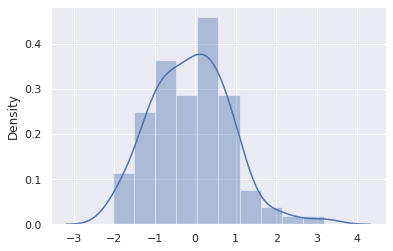

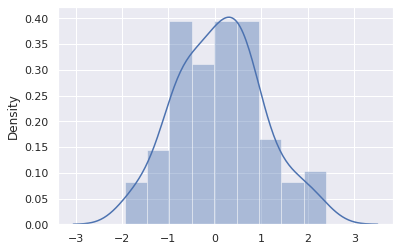

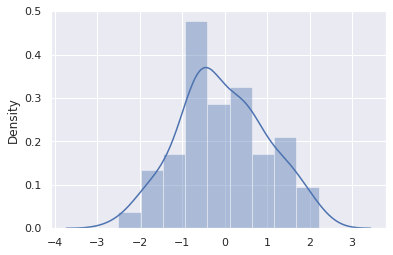

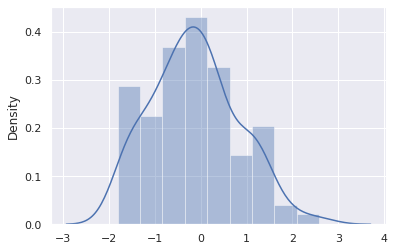

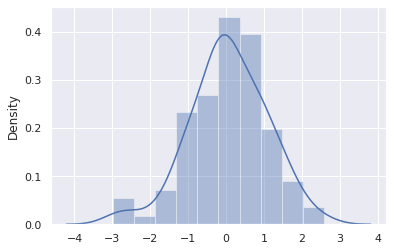

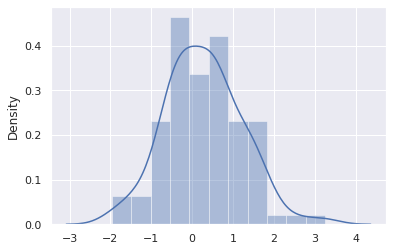

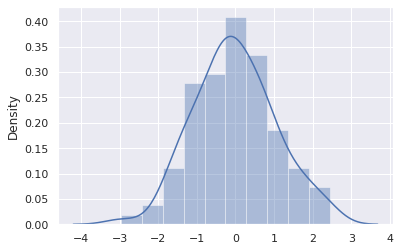

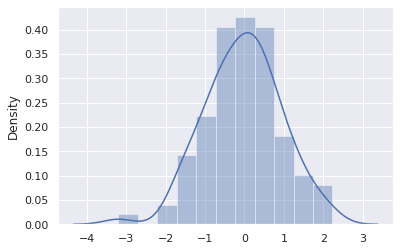

In [62]:
cols=[ 'rent_fee', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latatitude', 'longitude', 'sqft_living15', 'sqft_lot15']

#cols=df.columns
warnings.filterwarnings("ignore")
for i in cols:
  x = np.random.randn(100)
  ax = sns.distplot(x)
  plt.show()
    #dataframe1[i].plot.kde(label=i )
   # plt.legend()
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


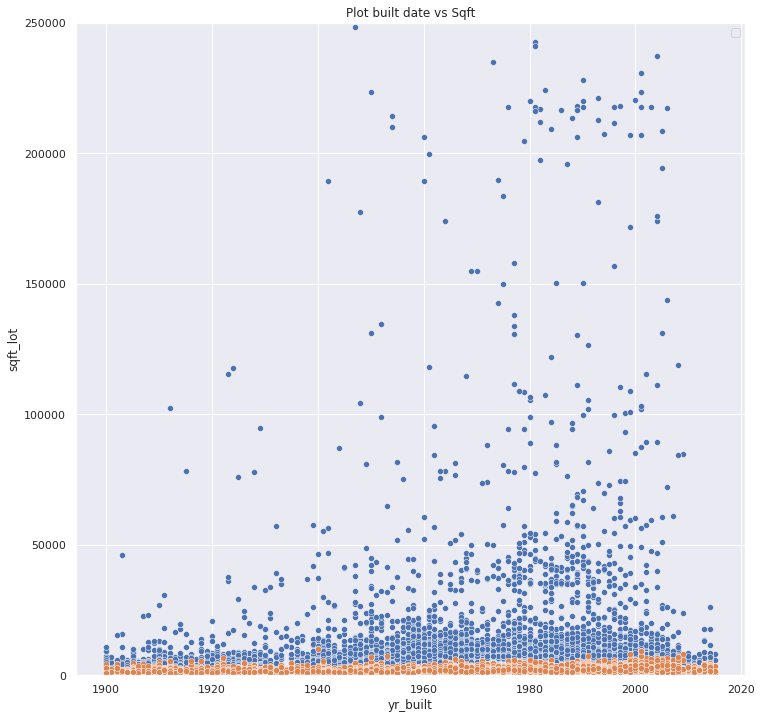

In [50]:
plt.figure(figsize=(12,12))
plt.ylim(0,250000)
sns.scatterplot(dataframe1.yr_built, dataframe1.sqft_lot)
sns.scatterplot(dataframe1.yr_built, dataframe1.sqft_living)
plt.title('Plot built date vs Sqft')
plt.legend()

#Rent fee vs House Build Date Created





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


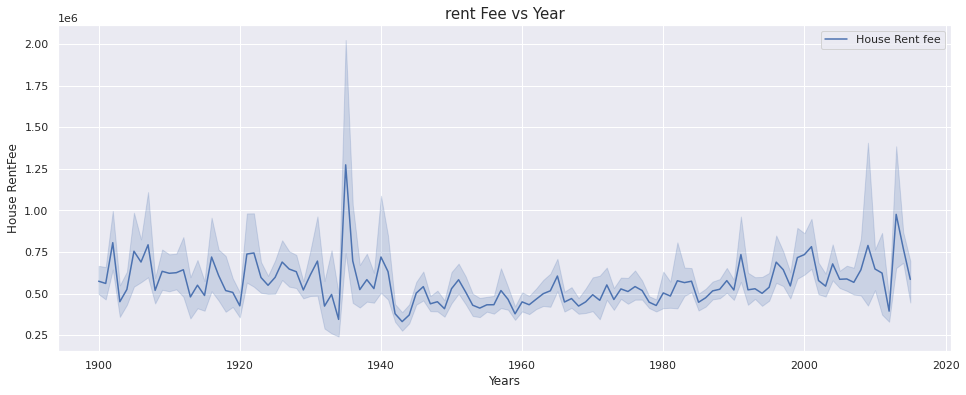

(<matplotlib.legend.Legend at 0x7f0f942e41d0>, None)

In [11]:
plt.figure(figsize=(16,6))
plt.title('rent Fee vs Year', fontdict={'fontsize': 15}), plt.xlabel('Years'), plt.ylabel('House RentFee')
sns.lineplot(dataframe1.yr_built, dataframe1.rent_fee, label='House Rent fee')
plt.legend(), plt.show()

How does the lot & living size effect the Rent Fee?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Text(0.5, 0, 'Rent Fee ')

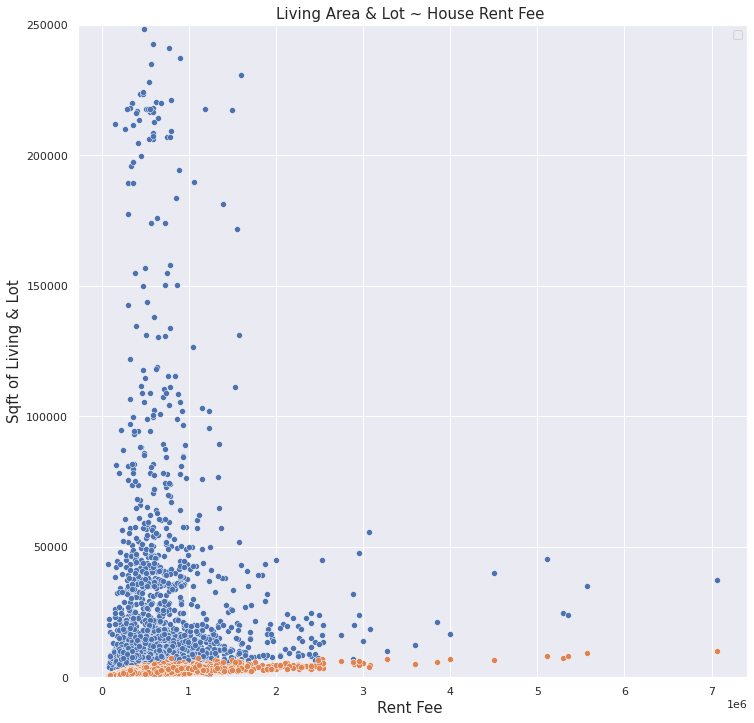

In [12]:
plt.figure(figsize=(12,12))
plt.ylim(0,250000)
sns.scatterplot(dataframe1.rent_fee, dataframe1.sqft_lot)
sns.scatterplot(dataframe1.rent_fee, dataframe1.sqft_living)
plt.legend()
plt.title('Living Area & Lot ~ House Rent Fee ', size=15)
plt.ylabel('Sqft of Living & Lot', size=15)
plt.xlabel('Rent Fee ', size=15)

Correlation

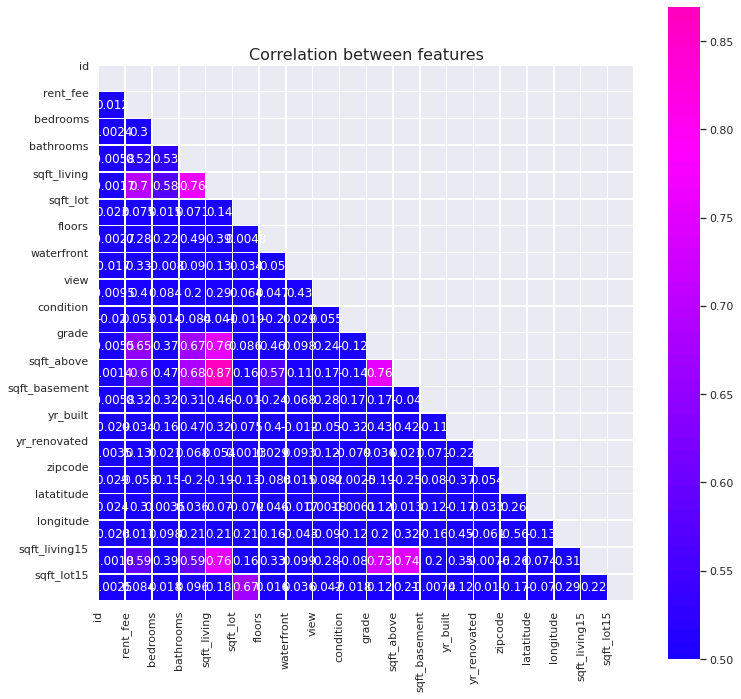

In [13]:
plt.figure(figsize=(12,12))
# Compute the correlation matrix
corr = dataframe1.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0, vmin=0.5, square=True, linewidths=.5, cmap='gist_rainbow')
plt.title('Correlation between features', fontdict={'fontsize': 16})
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Select Data Column to work

In [26]:
df_cont=dataframe1.loc[:,['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]

In [37]:
#select Category list
cat_list=['yr_built','condition','longitude','latatitude','waterfront','floors','view', 'bedrooms','sqft_basement']

In [38]:

df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=dataframe1[i].astype('category')

In [44]:
from sklearn.preprocessing import quantile_transform
transform = quantile_transform(df_cont[['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']],
                                    output_distribution = 'normal')

trans_features = pd.DataFrame(transform)
trans_features.columns=['rent_fee','sqft_living','sqft_lot','sqft_living15','sqft_lot15']

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2670: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)


In [45]:

df_final=pd.concat([trans_features, df_cat], axis=1)

In [46]:
def sklearnmodel (y, X):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    #Calculating predictions on the train set, and on the test set
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    #Calculating your residuals
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

    #Calculating the Mean Squared Error
    from sklearn.metrics import mean_squared_error
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)

    # Visualization of selection of 100 house rent
    plt.figure(figsize=(16,6))
    sns.scatterplot(range(len(y_hat_test[:100])), y_hat_test[:100], label='Predicted Rent fee')
    sns.scatterplot(range(len(y_hat_test[:100])), y_test[:100], label='Actual Rent fee')
    plt.title('Comparing predicted rent fee vs actual rent fee', fontdict={'fontsize': 15}), plt.xlabel('Observation'), plt.ylabel('Rent fee')
    plt.legend(), plt.show()
    return (linreg)

R^2 Score: 0.72
Train Mean Squarred Error: 0.2756993332402649
Test Mean Squarred Error: 0.29439012843042583


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


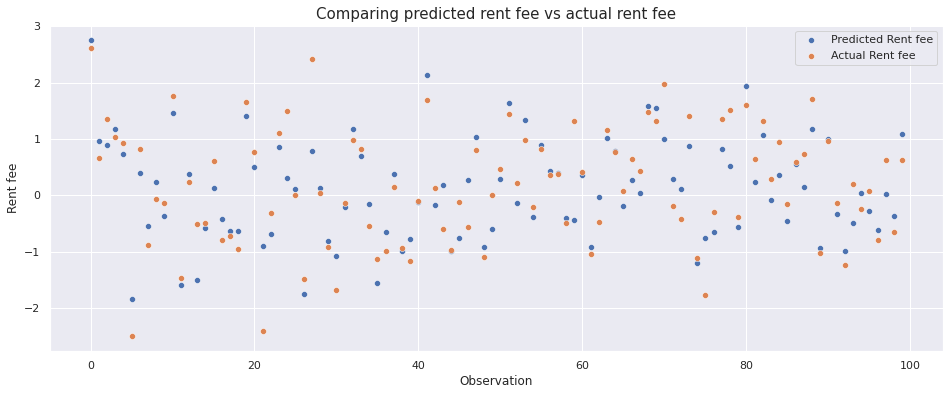

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#defining the target and the predictors
y = df_final.rent_fee
X = df_final.drop(['rent_fee'], axis=1)


#Running the model with df_final for all independent and dependent features.
sklearnmodel (y, X)